# As Tutorial

In [254]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [255]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [256]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [257]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [258]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [259]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_tut.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Improve

In [260]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [261]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [262]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Check invalid data

In [263]:
train_data.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

- **Fill `Nan` value with median for column `Fare`, `Age` and `Age` instead of remove these features**
- **Feature `Embarked` is filled with the most frequent**

These features might contain more information for the prediction

In [264]:
# Create a funtion
def fill_na(df):
    freq_port = df.Embarked.dropna().mode()[0]
    df['Embarked'] = df['Embarked'].fillna(freq_port)
    df['Fare'].fillna(df['Fare'].dropna().median(), inplace=True)
    df['Age'].fillna(df['Age'].dropna().median(), inplace=True)
    

In [265]:
fill_na(train_data)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [266]:
fill_na(test_data)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [267]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [268]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


## Visualization

For more information about relation of other feature and the target

In [269]:
print(f"Column: {train_data.columns.values}")

Column: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [270]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

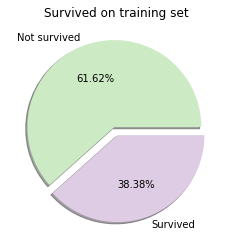

In [271]:
plt.pie(train_data['Survived'].value_counts(),
        labels=['Not survived','Survived'],
        autopct="%.2f%%",
        colors=matplotlib.cm.Pastel1.colors[2:4],
        explode=[0.05,0.05],
        shadow=True)
plt.title("Survived on training set")
plt.show()

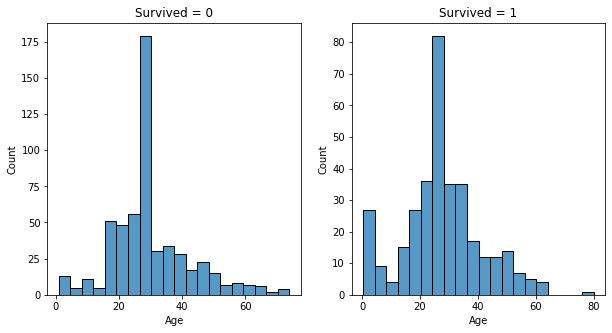

In [272]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.histplot(data=train_data[train_data["Survived"]==0],x='Age',bins=20)
ax1.set_title("Survived = 0")

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(data=train_data[train_data["Survived"]==1],x='Age',bins=20)
ax2.set_title("Survived = 1")
plt.show()

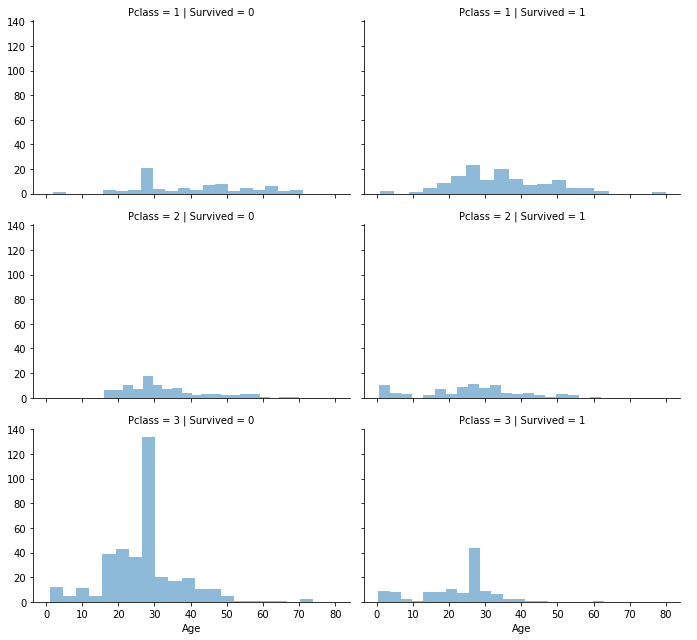

In [273]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

- **Adding a column `FamilySize`, by all sib/sp par/ch and himself**

In [274]:
def proc_data(df):
    df['FamilySize'] = df ['SibSp'] + df['Parch'] + 1
    df.drop(["Name",'Cabin',"Ticket"], axis=1, inplace=True)

In [275]:
proc_data(train_data)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,1,0,7.2500,S,2
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [276]:
proc_data(test_data)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,2
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,3


# Model

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

**Define features for training**

In [278]:
feats = ["Pclass", "Sex", "SibSp", "Parch",'Embarked','Age','Fare','FamilySize']

**Prepare input for our  models, by use onehotencoding for categorical data**

**Apply on train data, also test data for prediction**

In [279]:
X_train = pd.get_dummies(train_data[feats])
X_train

,Pclass,SibSp,Parch,Age,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,22.0,7.2500,2,0,1,0,0,1
1,1,1,0,38.0,71.2833,2,1,0,1,0,0
2,3,0,0,26.0,7.9250,1,1,0,0,0,1
3,1,1,0,35.0,53.1000,2,1,0,0,0,1
4,3,0,0,35.0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,27.0,13.0000,1,0,1,0,0,1
887,1,0,0,19.0,30.0000,1,1,0,0,0,1
888,3,1,2,28.0,23.4500,4,1,0,0,0,1
889,1,0,0,26.0,30.0000,1,0,1,1,0,0


In [280]:
X_test = pd.get_dummies(test_data[feats])
X_test.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,34.5,7.8292,1,0,1,0,1,0
1,3,1,0,47.0,7.0000,2,1,0,0,0,1
2,2,0,0,62.0,9.6875,1,0,1,0,1,0
3,3,0,0,27.0,8.6625,1,0,1,0,0,1
4,3,1,1,22.0,12.2875,3,1,0,0,0,1


In [281]:
y_train = train_data["Survived"]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

**Standadize data to produce the bias**

In [298]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Try with another simple model: LogisticRegression**

In [301]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_sc, y_train)

LogisticRegression(solver='liblinear')

In [302]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

lr = LogisticRegression(max_iter=2000)
clf = GridSearchCV(lr, 
                   param_grid = parameters,  
                   scoring='accuracy',       
                   cv=10) 

clf.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=2000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [303]:
clf.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [319]:
clf.best_estimator_.score(X_train,y_train)

0.7878787878787878

In [304]:
Y_pred = clf.best_estimator_.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv("submission_lr.csv",index=False)

## RandomForest

In [305]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(f"Random Forest Score: {rfc_sc}")

Random Forest Score: 0.7982062780269058


**Using GridSearchCV to to find the hyperparameter can get the best score**

In [306]:
n_estimators = [100, 300, 800, 1200]

max_depth = [5,15, 25, 50, 100]

min_samples_split = [2, 10, 15, 50]

min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
rf = RandomForestClassifier()
gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 2, 
                      n_jobs = -1)

bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits

[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   2.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   3.4s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   3.5s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=50, n_estimators=300; total time=   0.8s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=50, n_estimators=800; total time=   2.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=50, n_estimators=1200; total time=   3.3s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   2.2s
[CV] END max_dep

In [307]:
gridF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}
 
 {'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 800}

In [308]:
best_E = gridF.best_estimator_


In [317]:
gridF.best_estimator_.score(X_train,y_train)

0.9046015712682379

In [309]:
Y_pred = bestF.best_estimator_.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv("submission_rf.csv",index=False)


[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   2.3s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   2.1s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=50, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=50, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=50, n_estimators=100

In [310]:
from sklearn.svm import SVC
svc = SVC()
para = {'C': [0.01,0.1,1,10,100], 'gamma' : [10,1,0.1,0.001]}
grid = GridSearchCV(svc, para, refit = True, verbose = 3)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..................C=0.01, gamma=10;, score=0.615 total time=   0.0s
[CV 2/5] END ..................C=0.01, gamma=10;, score=0.618 total time=   0.0s
[CV 3/5] END ..................C=0.01, gamma=10;, score=0.618 total time=   0.0s
[CV 4/5] END ..................C=0.01, gamma=10;, score=0.618 total time=   0.0s
[CV 5/5] END ..................C=0.01, gamma=10;, score=0.612 total time=   0.0s
[CV 1/5] END ...................C=0.01, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ...................C=0.01, gamma=1;, score=0.657 total time=   0.0s
[CV 3/5] END ...................C=0.01, gamma=1;, score=0.646 total time=   0.0s
[CV 4/5] END ...................C=0.01, gamma=1;, score=0.618 total time=   0.0s
[CV 5/5] END ...................C=0.01, gamma=1;, score=0.612 total time=   0.0s
[CV 1/5] END .................C=0.01, gamma=0.1;, score=0.615 total time=   0.0s
[CV 2/5] END .................C=0.01, gamma=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [10, 1, 0.1, 0.001]},
             verbose=3)

In [311]:
grid.best_params_

{'C': 1, 'gamma': 10}

In [315]:
grid.best_estimator_.score(X_train,y_train)

0.8529741863075196

In [314]:
Y_pred = grid.best_estimator_.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv("submission_svc.csv",index=False)